link:https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil

#### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r"C:\Users\virat\amazon.csv", encoding='latin-1',parse_dates=['date'])


In [8]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [9]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

#### Display Top 5 Rows of The Dataset

In [10]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


#### Check For Duplicate Data and Drop Them

In [11]:
data_data = data.duplicated().any()

In [12]:
data_data

True

In [13]:
data = data.drop_duplicates()

In [15]:
data.shape

(6422, 5)

#### Check Null Values In The Dataset

In [17]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

<Axes: >

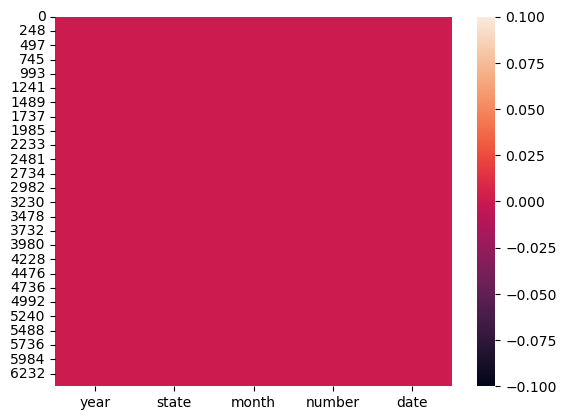

In [20]:
sns.heatmap(data.isnull())

#### Rename Month Names To English

In [23]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [30]:
month_mapping = {
    'Janeiro': 'January',
    'Fevereiro': 'February',
    'Março': 'March',
    'Abril': 'April',
    'Maio': 'May',
    'Junho': 'June',
    'Agosto': 'August',
    'Setembro': 'September',
    'Outubro': 'October',
    'Novembro': 'November',
    'Dezembro': 'December'
}

In [41]:
data['month_new'] = data['month'].map(month_mapping)

C:\Users\virat\AppData\Local\Temp\ipykernel_37428\2166203946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_new'] = data['month'].map(month_mapping)


In [29]:
##data['momth_new'] = data['month'].map({'Janeiro':'January','Fevereiro':'February','Março':'March','Abril':'Apriel','Maio':'May','Junho':'June','Agosto':'August','Setembro':'September','Outubro':'October','Novembro':'November','Dezembro':'December'})

In [42]:
data['month_new']

0        January
1        January
2        January
3        January
4        January
          ...   
6449    December
6450    December
6451    December
6452    December
6453    December
Name: month_new, Length: 6422, dtype: object

In [33]:
data.nunique()

year           20
state          23
month          12
number       1479
date           20
momth_new      11
dtype: int64

#### Total Number of Fires Registered

In [34]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'momth_new'], dtype='object')

In [45]:
data1 = data.groupby('month_new')['number'].sum().reset_index()

<Axes: xlabel='month_new', ylabel='number'>

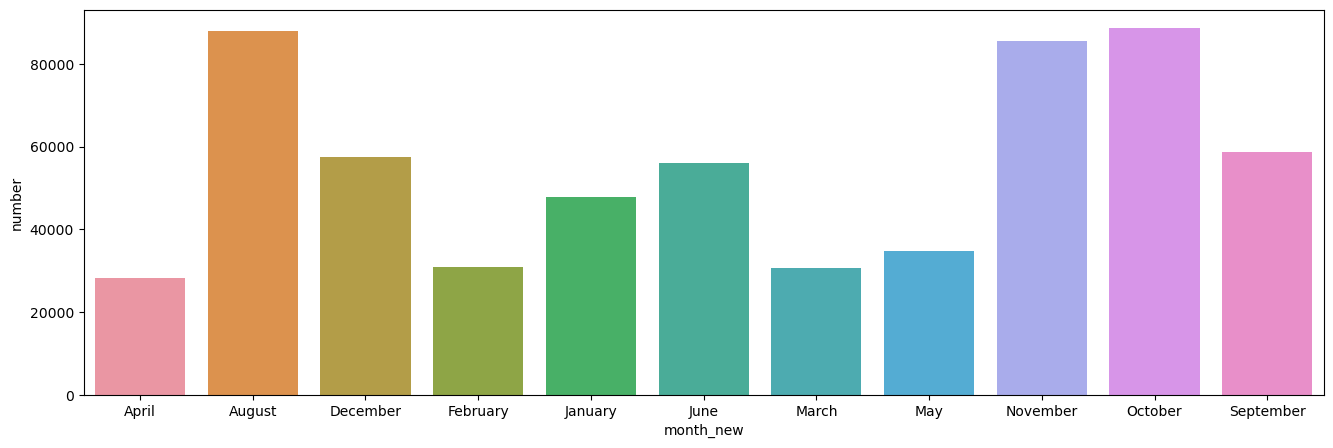

In [47]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new',y='number',data=data1)

In [48]:
data2 = data.groupby('year')['number'].sum().reset_index()

#### In Which Year Maximum Number of Forest Fires Were Reported?

<Axes: xlabel='year', ylabel='number'>

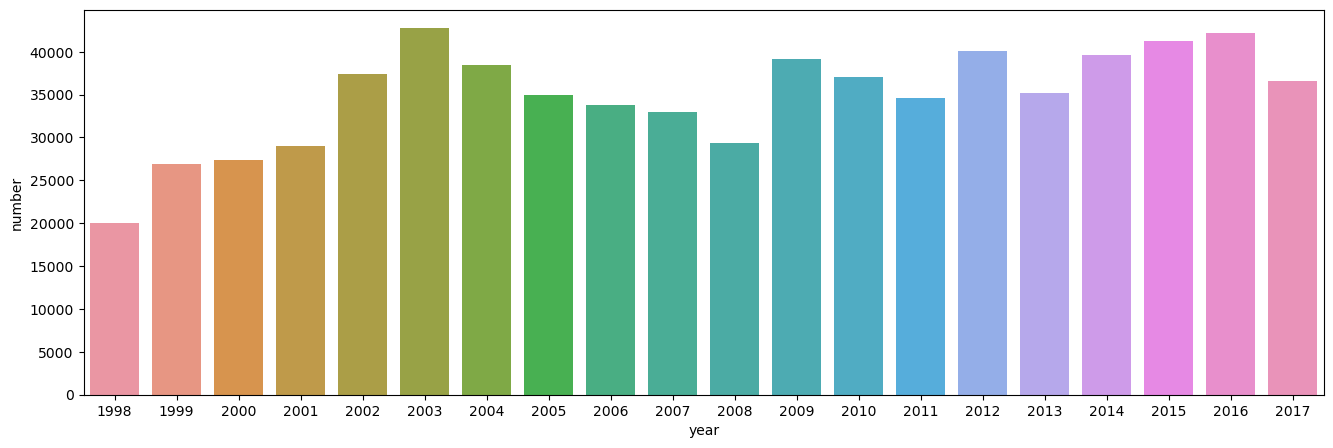

In [49]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data2)

#### In Which State Maximum Number of Forest Fires Were Reported?

In [50]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'momth_new', 'month_new'], dtype='object')

In [53]:
data3 = data.groupby('state')['number'].sum().reset_index()

In [54]:
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


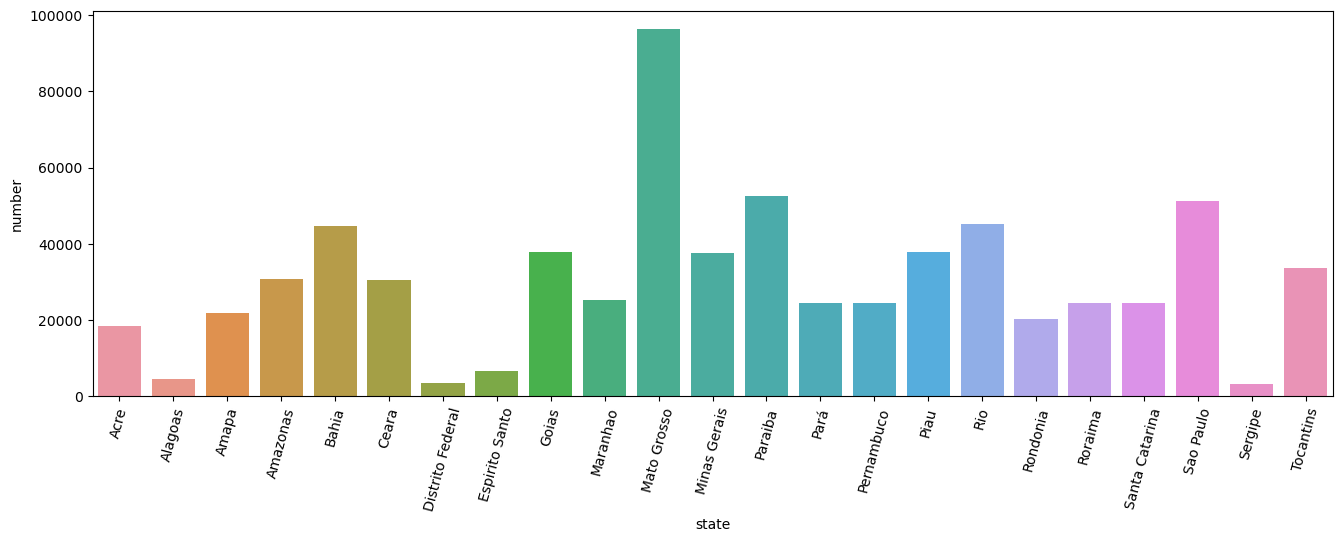

In [56]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data3)
plt.xticks(rotation=75)
plt.show()

In [61]:
data[data['state'] == "Amazonas"]['number'].sum()

30650.129

#### Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [65]:
data5 = data4.groupby('year')['number'].sum().reset_index()

In [66]:
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

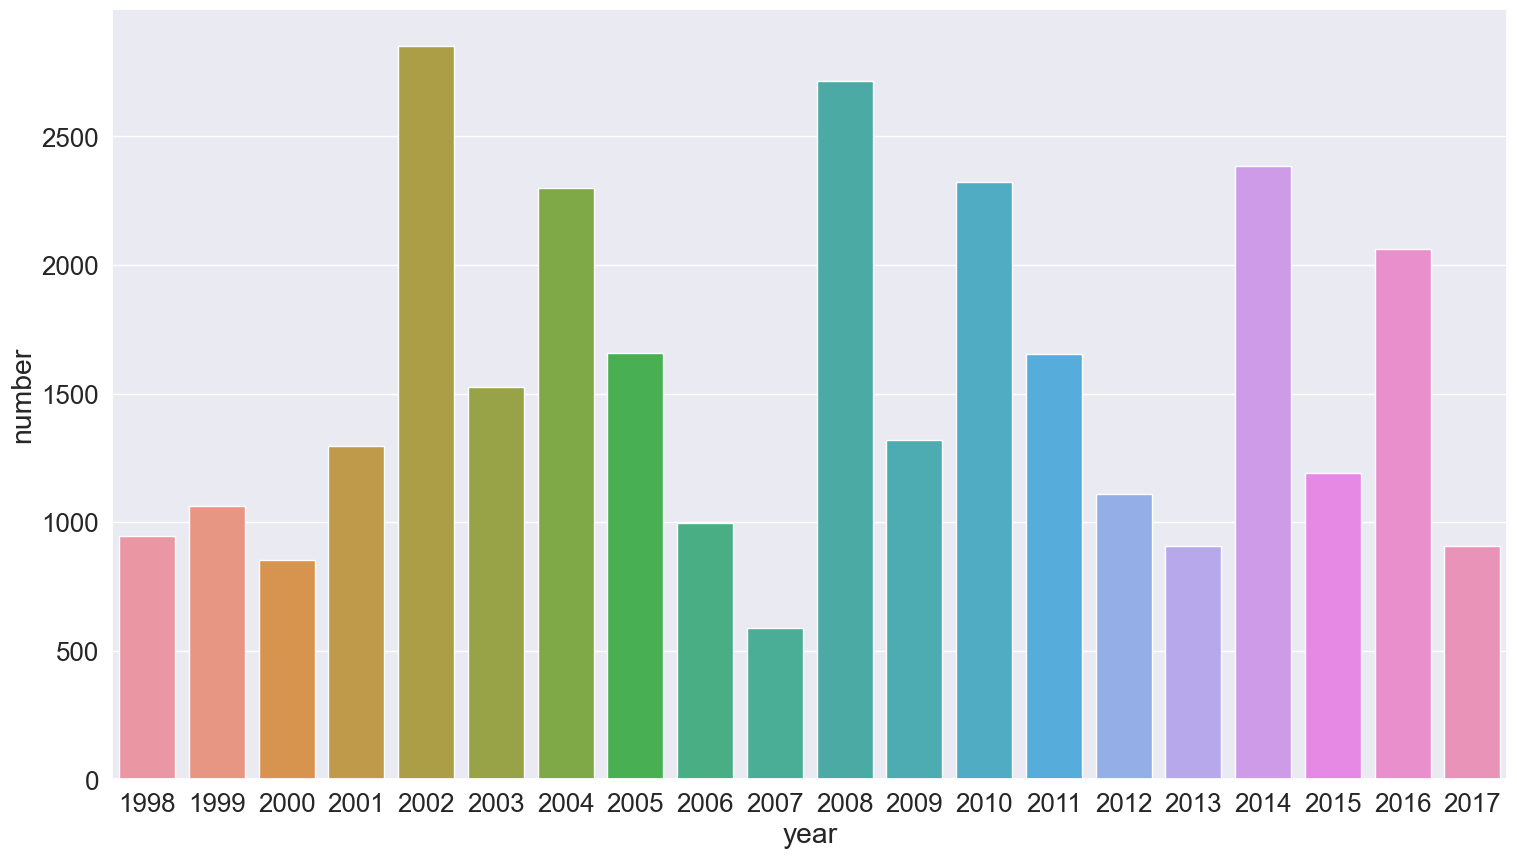

In [73]:
plt.figure(figsize=(18,10))
sns.set(font_scale=1.7)
sns.barplot(x='year',y='number',data=data5)

#### Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [85]:
data6 = data[data['state']=="Amazonas"]

In [88]:
day = data6.groupby(data6['date'].dt.dayofweek).sum()

C:\Users\virat\AppData\Local\Temp\ipykernel_37428\3835596122.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day = data6.groupby(data6['date'].dt.dayofweek).sum()


In [89]:
day = data6.groupby(data6['date'].dt.dayofweek).sum().number
import calendar
day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()

C:\Users\virat\AppData\Local\Temp\ipykernel_37428\929421018.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day = data6.groupby(data6['date'].dt.dayofweek).sum().number


In [90]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='index', ylabel='number'>

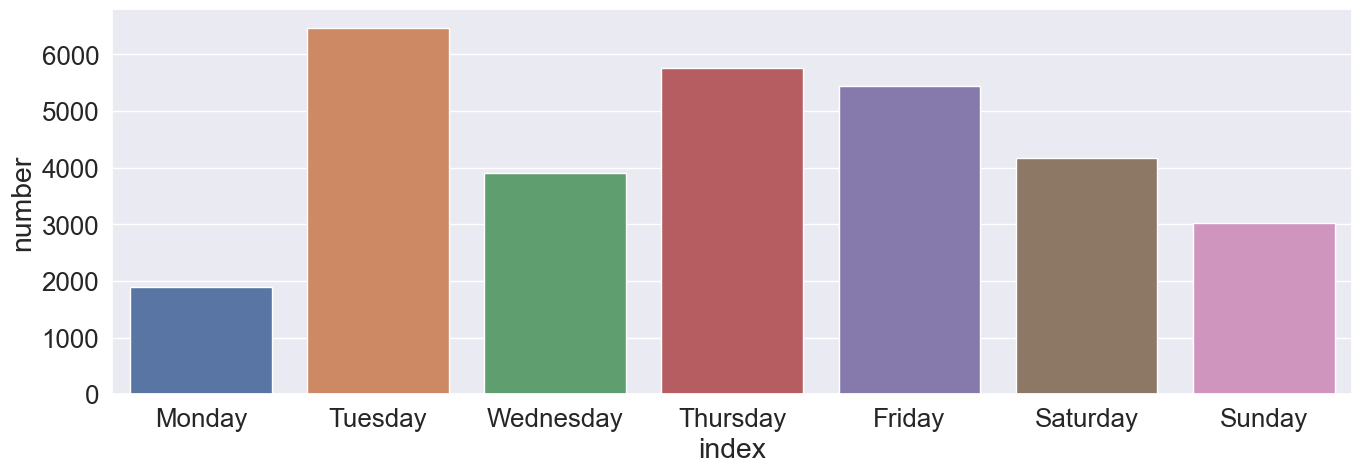

In [92]:
plt.figure(figsize=(16,5))
sns.barplot(x='index',y='number',data=day)

#### Find Total Number of Fires Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [93]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'momth_new', 'month_new'], dtype='object')

In [97]:
fire = data[data['year'] == 2015].groupby('month_new')['number'].sum().reset_index()

In [98]:
fire

,month_new,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,June,3260.552
6,March,2202.000
7,May,2384.000
8,November,4034.518
9,October,4499.525


<Axes: xlabel='month_new', ylabel='number'>

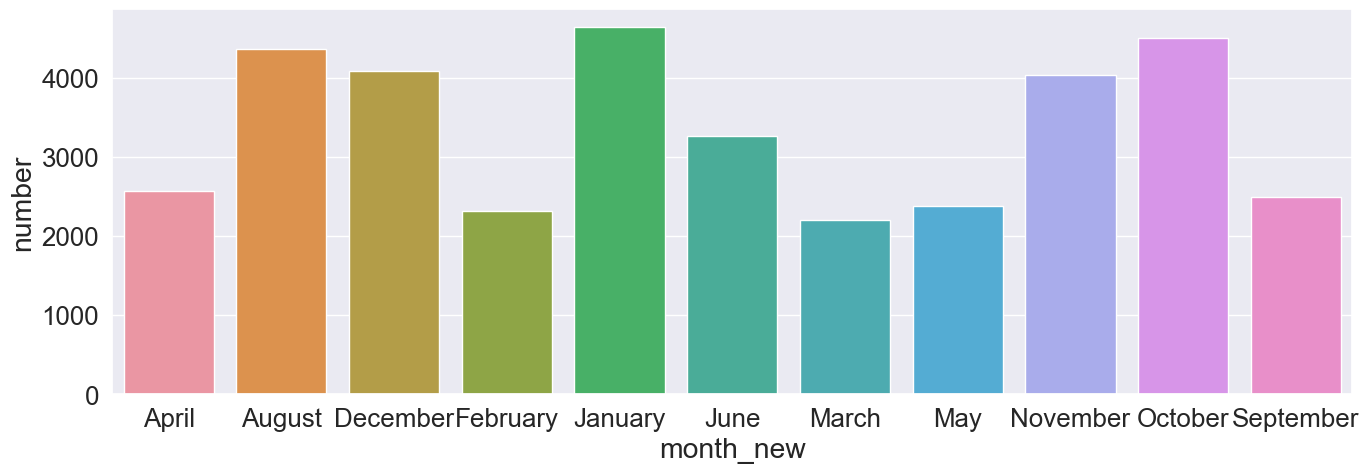

In [101]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new',y='number',data=fire)

#### Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [102]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'momth_new', 'month_new'], dtype='object')

In [106]:
data8 = data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [107]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


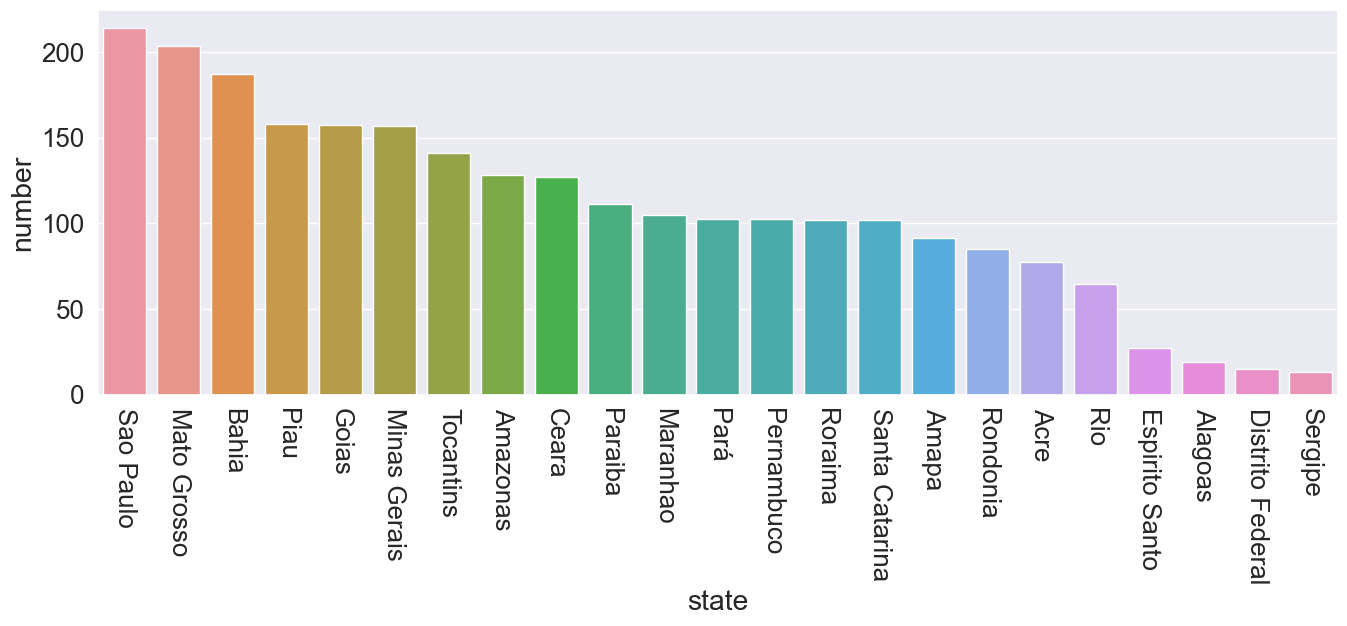

In [115]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data8)
plt.xticks(rotation=270)
plt.show()

#### To Find The State Names Where Fires Were Reported In 'dec' Month

In [116]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'momth_new', 'month_new'], dtype='object')

In [125]:
data9 = data[data['month_new'] == 'December']['state'].unique()

In [126]:
data9

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)